The derivation in the textbook shows that q is a solution to the equation
$$q=e^{⟨k⟩ (q-1)} $$

Given the information above, what is the theoretical estimate for the number of nodes in the LCC, expressed in terms of the known variables, n, q, and ⟨k⟩?

Answer:
$$(1-q) * n$$


In [1]:
from scipy.optimize import root
import matplotlib.pyplot as plt
import numpy as np

def calculate_q(k):
    return root(lambda q: q - np.exp(k * (q-1)), 0 ).x[0]

n = 20
LCC = [n * (1 - calculate_q(k)) for k in range(1,10)]

plt.plot(range(1,10), LCC)
plt.xlabel('average degree (k)')
plt.ylabel('size of LCC')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
import networkx as nx
import numpy as np

p = np.random.uniform(0.001, 0.01)

for i in range (0,1):
    g=nx.erdos_renyi_graph(1000,p)
#     largest_cc = max(nx.connected_components(g), key=len)
    print(len(g.edges()))
#     calculate_q()

4514


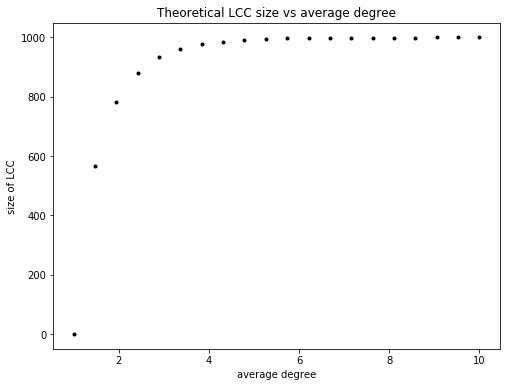

In [3]:
# Number of nodes
nodes = 1000

# Average degree
k = np.linspace(1, 10, 20)

# Probability of not being in the LCC
q = np.array([calculate_q(_) for _ in k])

# Theoretical size of the LCC
lcc_size = nodes * (1 - q)

plt.figure(figsize=(8, 6))
plt.plot(k, lcc_size, 'k.')
plt.xlabel('average degree')
plt.ylabel('size of LCC')
plt.title('Theoretical LCC size vs average degree')
plt.show()

0.001 0.982 101
0.001090909090909091 1.124 167
0.0011818181818181819 1.138 79
0.0012727272727272728 1.314 377
0.0013636363636363637 1.38 522
0.0014545454545454547 1.492 563
0.0015454545454545456 1.526 599
0.0016363636363636363 1.52 591
0.0017272727272727275 1.702 669
0.0018181818181818182 1.864 755
0.0019090909090909093 1.838 758
0.002 1.982 789
0.002090909090909091 2.186 836
0.002181818181818182 2.122 829
0.0022727272727272726 2.16 859
0.0023636363636363638 2.306 879
0.002454545454545455 2.498 897
0.0025454545454545456 2.586 918
0.0026363636363636363 2.578 886
0.0027272727272727275 2.612 907
0.0028181818181818186 2.848 936
0.0029090909090909093 2.814 938
0.003 2.896 929
0.003090909090909091 2.956 939
0.003181818181818182 3.202 962
0.003272727272727273 3.258 946
0.003363636363636364 3.386 965
0.003454545454545455 3.398 956
0.0035454545454545456 3.578 971
0.003636363636363637 3.686 974
0.0037272727272727275 3.634 976
0.0038181818181818187 3.784 973
0.003909090909090909 4.102 980
0.004 3

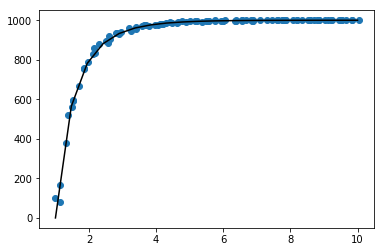

In [5]:
# Run your experiment here
experimental_k = []
experimental_lcc_size = []

n = 1000
probs = np.linspace(0.001,0.01,100)

for p in probs:
    graph = nx.erdos_renyi_graph(n, p)
    experimental_k.append(np.mean(list(dict(graph.degree()).values())))
    experimental_lcc_size.append(max(len(cc) for cc in nx.connected_components(graph)))
    print(p, np.mean(list(dict(graph.degree()).values())), max(len(cc) for cc in nx.connected_components(graph)))

    # Plot theoretical and experimental data
plt.scatter(experimental_k, experimental_lcc_size)
plt.plot(k, lcc_size, c = "black")
plt.show()
